In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as ticker

from collections import Counter
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns

In [2]:
LC05 = pd.read_csv("./LC2013_ACC05.csv", names=['n1','n2','n3','n4','n5','n6','n7','n8',
                                               'n9','n10','n11','n12','n13','n14','n15','n16',
                                               'n17', 'n18','rl'])
LC10 = pd.read_csv("./LC2013_ACC10.csv", names=['n1','n2','n3','n4','n5','n6','n7','n8',
                                               'n9','n10','n11','n12','n13','n14','n15','n16',
                                               'n17', 'n18','rl'])
LC15 = pd.read_csv("./LC2013_ACC15.csv", names=['n1','n2','n3','n4','n5','n6','n7','n8',
                                               'n9','n10','n11','n12','n13','n14','n15','n16',
                                               'n17', 'n18','rl'])
LC20 = pd.read_csv("./LC2013_ACC20.csv", names=['n1','n2','n3','n4','n5','n6','n7','n8',
                                               'n9','n10','n11','n12','n13','n14','n15','n16',
                                               'n17', 'n18','rl'])
LC25 = pd.read_csv("./LC2013_ACC25.csv", names=['n1','n2','n3','n4','n5','n6','n7','n8',
                                               'n9','n10','n11','n12','n13','n14','n15','n16',
                                               'n17', 'n18','rl'])

In [4]:
LC05

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16,n17,n18,rl
0,[0.7773245739870721,1.353081,1.112255,1.077757,1.098296,0.986321,0.983492,0.852237,1.150315,1.090777,0.842649,1.116021,0.790722,1.029464,1.262663,0.628910,0.837322,0.9904210271941921],NaN
1,[0.8000153972483981,0.998625,0.972747,1.029018,1.302369,1.105349,1.189460,0.866496,1.034886,1.116077,0.721425,0.875436,0.868646,0.938838,1.035679,1.021183,0.732624,1.032757206532952],NaN
2,[0.605199960831666,0.735721,0.904043,0.653104,1.128438,0.962195,1.103261,1.181160,1.144857,0.663228,0.614425,0.938371,1.043024,0.672463,0.796995,0.896769,0.881397,1.1854162574681515],NaN
3,[1.1436659606589443,0.835340,1.115704,0.935590,0.875044,1.072022,0.886765,1.060717,1.156797,1.029790,1.112746,0.820319,0.972134,0.905498,1.184071,1.196199,0.881355,1.0284782093865046],NaN
4,[1.0673522645964117,0.859831,1.126065,0.726317,0.937322,1.303848,0.784733,1.155497,0.824897,0.848778,0.761188,0.927771,0.818582,1.048741,1.167787,0.954998,1.039236,1.1534607610356788],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,[0.08808819699406722,-0.039466,-0.040882,0.010219,0.037354,0.390895,0.474893,0.106226,-0.297467,0.060137,-0.027080,0.135933,0.057339,-0.001987,-0.160075,0.268997,0.110744,-0.015142617579178008],NaN
2996,[0.013282216524936885,-0.006876,-0.046432,0.127118,0.022055,0.080383,-0.174408,0.094563,0.438540,-0.388610,0.337316,-0.026104,0.119070,0.202947,-0.097696,0.022406,-0.158142,-0.009498121240083535],NaN
2997,[0.058206537784419865,0.172363,-0.024602,-0.089937,-0.057494,-0.007621,-0.160536,0.139519,-0.196256,-0.150404,-0.207817,0.252900,-0.037910,0.195816,-0.018961,0.018668,0.054963,0.02259787517139511],NaN
2998,[0.17636897862491452,0.181689,-0.154479,-0.005093,0.055442,0.007359,-0.176927,-0.281600,-0.209781,-0.055916,0.151679,-0.371214,-0.046430,0.068430,-0.085793,-0.033863,0.086018,-0.07341997517911203],NaN


In [3]:
LC05['rl'] = LC05['rl'].str.replace("]","")
LC05['rl'] = LC05['rl'].str.replace(" ","")
LC05['rl'] = pd.to_numeric(LC05['rl'])
LC05['n1'] = LC05['n1'].str.replace("[","")
LC05['n1'] = LC05['n1'].str.replace(" ","")
LC05['n1'] = pd.to_numeric(LC05['n1'])

LC10['rl'] = LC10['rl'].str.replace("]","")
LC10['rl'] = LC10['rl'].str.replace(" ","")
LC10['rl'] = pd.to_numeric(LC10['rl'])
LC10['n1'] = LC10['n1'].str.replace("[","")
LC10['n1'] = LC10['n1'].str.replace(" ","")
LC10['n1'] = pd.to_numeric(LC10['n1'])

LC15['rl'] = LC15['rl'].str.replace("]","")
LC15['rl'] = LC15['rl'].str.replace(" ","")
LC15['rl'] = pd.to_numeric(LC15['rl'])
LC15['n1'] = LC15['n1'].str.replace("[","")
LC15['n1'] = LC15['n1'].str.replace(" ","")
LC15['n1'] = pd.to_numeric(LC15['n1'])

LC20['rl'] = LC20['rl'].str.replace("]","")
LC20['rl'] = LC20['rl'].str.replace(" ","")
LC20['rl'] = pd.to_numeric(LC20['rl'])
LC20['n1'] = LC20['n1'].str.replace("[","")
LC20['n1'] = LC20['n1'].str.replace(" ","")
LC20['n1'] = pd.to_numeric(LC20['n1'])

LC25['rl'] = LC25['rl'].str.replace("]","")
LC25['rl'] = LC25['rl'].str.replace(" ","")
LC25['rl'] = pd.to_numeric(LC25['rl'])
LC25['n1'] = LC25['n1'].str.replace("[","")
LC25['n1'] = LC25['n1'].str.replace(" ","")
LC25['n1'] = pd.to_numeric(LC25['n1'])

AttributeError: Can only use .str accessor with string values!

In [7]:
LC05_non = LC05.drop(['rl'],axis=1)
LC10_non = LC10.drop(['rl'],axis=1)
LC15_non = LC15.drop(['rl'],axis=1)
LC20_non = LC20.drop(['rl'],axis=1)
LC25_non = LC25.drop(['rl'],axis=1)

In [9]:
histo05 = []
for i in range(1,19):
     histo05 += [round(j,2) for j in LC05_non['n{}'.format(i)]]

histo10 = []
for i in range(1,19):
     histo10 += [round(j,2) for j in LC10_non['n{}'.format(i)]]
        
histo15 = []
for i in range(1,19):
     histo15 += [round(j,2) for j in LC15_non['n{}'.format(i)]]

histo20 = []
for i in range(1,19):
     histo20 += [round(j,2) for j in LC20_non['n{}'.format(i)]]
        
histo25 = []
for i in range(1,19):
     histo25 += [round(j,2) for j in LC25_non['n{}'.format(i)]]

In [95]:
mu = np.mean(histo05)
sigma = np.var(histo05)

mu2 = np.mean(histo10)
sigma2 = np.var(histo10)

mu3 = np.mean(histo15)
sigma3 = np.var(histo15)

mu4 = np.mean(histo20)
sigma4 = np.var(histo20)

mu5 = np.mean(histo25)
sigma5 = np.var(histo25)



print(mu,sigma,
      mu2,sigma2,
     mu3,sigma3,
     mu4,sigma4,
     mu5,sigma5)

0.008264814814814813 0.07290925579903978 0.008331666666666668 0.15129763333055554 0.008396481481481482 0.2826930972468793 0.008325555555555555 0.47380977401358026 0.008204074074074075 0.7061047857611797


In [3]:
plt.figure(figsize=(15,20))
plt.boxplot([histo05, histo10, histo15, histo20, histo25])
plt.xticks([1,2,3,4,5],['0.5','1.0','1.5','2.0','2.5'],fontsize = 15)
plt.yticks(np.arange(-4.5,5,0.5),fontsize = 15)
plt.xlabel('Action noise variance',fontsize=20)
plt.ylabel('Acceleration',fontsize=25)

NameError: name 'histo05' is not defined

<Figure size 1080x1440 with 0 Axes>

Text(0, 0.5, 'Acceleration')

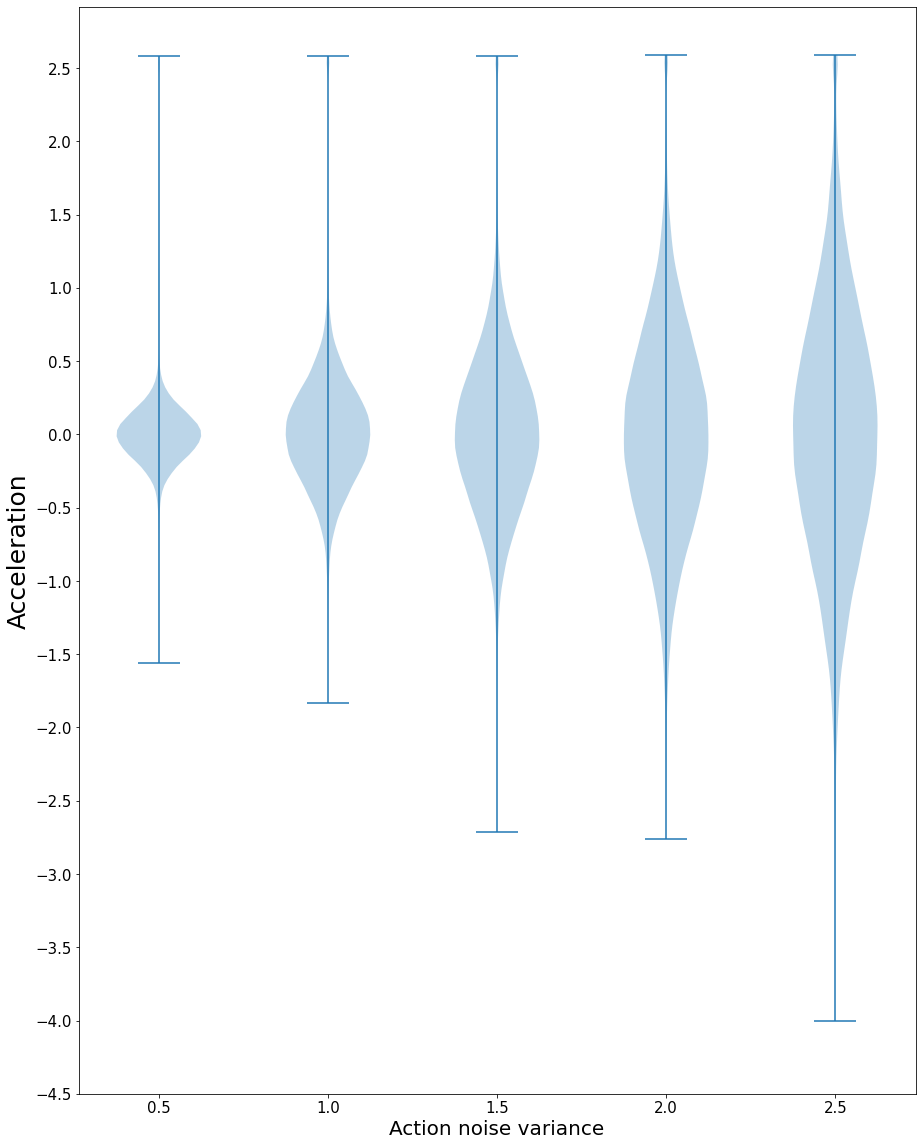

In [75]:
plt.figure(figsize=(15,20))
plt.violinplot([histo05, histo10, histo15, histo20, histo25])
plt.xticks([1,2,3,4,5],['0.5','1.0','1.5','2.0','2.5'],fontsize = 15)
plt.yticks(np.arange(-4.5,3,0.5),fontsize = 15)
plt.xlabel('Action noise variance',fontsize=20)
plt.ylabel('Acceleration',fontsize=25)

In [ ]:
TDLLdf = pd.DataFrame(TDL33, columns=['Road entropy ($e^H$)'])
TDLLdf['Action noise variance of non-AVs'] = pd.DataFrame(ANV3)

In [68]:
# ACCdf = pd.DataFrame([histo05,histo10,histo15,histo20,histo25], columns = ['0.5','1.0','1.5','2.0','2.5'])
ACC05df = pd.DataFrame(histo05, columns = ['Accleration1'])
ACC10df = pd.DataFrame(histo10, columns = ['Accleration2'])
ACC15df = pd.DataFrame(histo15, columns = ['Accleration3'])
ACC20df = pd.DataFrame(histo20, columns = ['Accleration4'])
ACC25df = pd.DataFrame(histo25, columns = ['Accleration5'])


In [69]:
ACCdf = pd.DataFrame

In [70]:
ACCdf = pd.concat([ACC05df,ACC10df,ACC15df,ACC20df,ACC25df],axis=1)

In [71]:
ACCdf

,Accleration1,Accleration2,Accleration3,Accleration4,Accleration5
0,1.04,0.78,1.62,1.16,0.29
1,1.14,0.89,0.86,0.29,1.37
2,1.16,1.19,0.38,1.61,0.40
3,0.86,0.72,0.56,0.73,1.00
4,0.76,0.38,1.34,1.44,0.63
...,...,...,...,...,...
53995,-0.12,-0.01,0.10,0.22,-0.34
53996,0.13,0.42,0.76,-0.53,0.61
53997,-0.32,-0.31,-0.17,-0.11,0.09
53998,0.09,0.11,-0.72,0.48,-0.37


<AxesSubplot:xlabel='Accleration', ylabel='Count'>

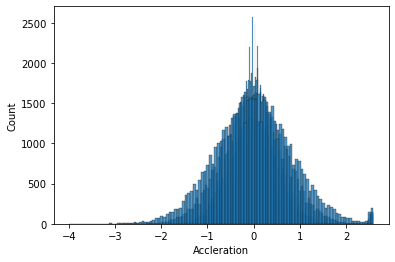

In [48]:
sns.histplot(x=ACC15df['Accleration'])

<AxesSubplot:xlabel='Accleration5', ylabel='Count'>

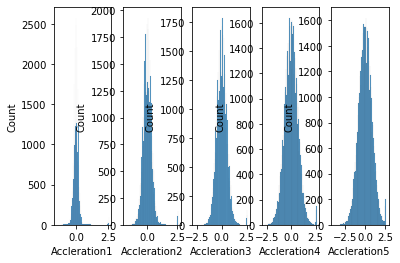

In [90]:
fig, ax = plt.subplots(ncols=5,)
sns.histplot(x=ACCdf['Accleration1'],ax=ax[0])
sns.histplot(x=ACCdf['Accleration2'],ax=ax[1])
sns.histplot(x=ACCdf['Accleration3'],ax=ax[2])
sns.histplot(x=ACCdf['Accleration4'],ax=ax[3])
sns.histplot(x=ACCdf['Accleration5'],ax=ax[4])

<AxesSubplot:ylabel='Accleration1'>

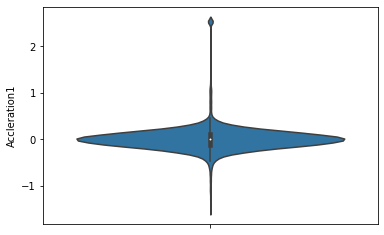

In [74]:
plt.violinplot